In [1]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential, Model
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from helper_functions import *

tf.random.set_seed(1)

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json

data = pd.read_csv("../last_1825_days.csv", header=0, index_col=0)
data = data.sort_values('date')

#### Train-Test split for time-series ####
test_ratio = 0.2
training_ratio = 1 - test_ratio
window_sizes = [20, 50, 200]

layer_units, optimizer = 50, 'adam' 
cur_epochs = 50
cur_batch_size = 20

cur_LSTM_pars = {'units': layer_units, 
                    'optimizer': optimizer, 
                    'batch_size': cur_batch_size, 
                    'epochs': cur_epochs
                    }
    
# scale 
scaler = StandardScaler()
data['close'] = scaler.fit_transform(data[['close']])

X_train, y_train, X_test, y_test = split_data(data, training_ratio, window_sizes[0])

### Build a LSTM model and log model summary to Neptune ###    
def Run_LSTM(X_train, layer_units=50):     
    inp = Input(shape=(X_train.shape[1], 1))
    
    x = LSTM(units=layer_units, return_sequences=True)(inp)
    x = LSTM(units=layer_units)(x)
    out = Dense(1, activation='linear')(x)
    model = Model(inp, out)
    
    # Compile the LSTM neural net
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')

    return model

model = Run_LSTM(X_train, layer_units=layer_units)

history = model.fit(X_train, y_train, epochs=cur_epochs, batch_size=cur_batch_size, 
                    verbose=1, validation_split=0.1, shuffle=True)


2022-12-13 14:13:56.813091: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 14:13:56.813220: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/50


2022-12-13 14:13:57.938947: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-13 14:13:58.667280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-13 14:13:58.897261: W tensorflow/core/framework/op_kernel.cc:1722] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node 'mean_squared_error/Cast' defined at (most recent call last):
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/asyncio/base_events.py", line 1899, in _run_once
      handle._run()
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/gr/ldz_xc410tb_q2m1b6j4t3580000gn/T/ipykernel_17148/2047766811.py", line 55, in <cell line: 55>
      history = model.fit(X_train, y_train, epochs=cur_epochs, batch_size=cur_batch_size,
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/hamzaqureshi/miniconda/envs/crypto/lib/python3.10/site-packages/keras/losses.py", line 1326, in mean_squared_error
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'mean_squared_error/Cast'
2 root error(s) found.
  (0) UNIMPLEMENTED:  Cast string to float is not supported
	 [[{{node mean_squared_error/Cast}}]]
  (1) CANCELLED:  Function was cancelled before it was started
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_5423]

2022-12-12 23:22:02.238288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-12 23:22:02.336081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-12 23:22:02.401946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 17ms/step
1932.6605917178474 4.329943791547437


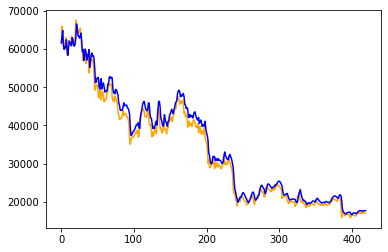

In [19]:
predicted_price_ = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price_)


# Evaluate performance
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
rmse_lstm = calculate_rmse(predicted_price, y_test)
mape_lstm = calculate_mape(predicted_price, y_test)


print(rmse_lstm, mape_lstm)
plot_results(y_test, predicted_price)


dict_keys(['loss', 'val_loss'])


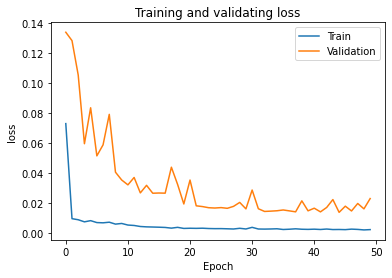

In [20]:
def plot_loss(data):
    print(data.history.keys())
    plt.plot(data.history['loss'], label='Train')
    plt.plot(data.history['val_loss'], label='Validation')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.title('Training and validating loss')
    plt.legend()
    plt.show()
    
plot_loss(history)